<a href="https://colab.research.google.com/github/GradientDescentintoGiggles/GradientDescent/blob/main/15_Sep_lasso_and_elasticNET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import sklearn
df = pd.read_csv("15 Sep Lasso and elasticNet.csv")

In [20]:
df.head(1)
df.shape

(200, 7)

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'income'}>,
        <Axes: title={'center': 'education_years'}>],
       [<Axes: title={'center': 'hours_worked_per_week'}>,
        <Axes: title={'center': 'credit_score'}>,
        <Axes: title={'center': 'spending_score'}>],
       [<Axes: title={'center': 'high_spender'}>, <Axes: >, <Axes: >]],
      dtype=object)

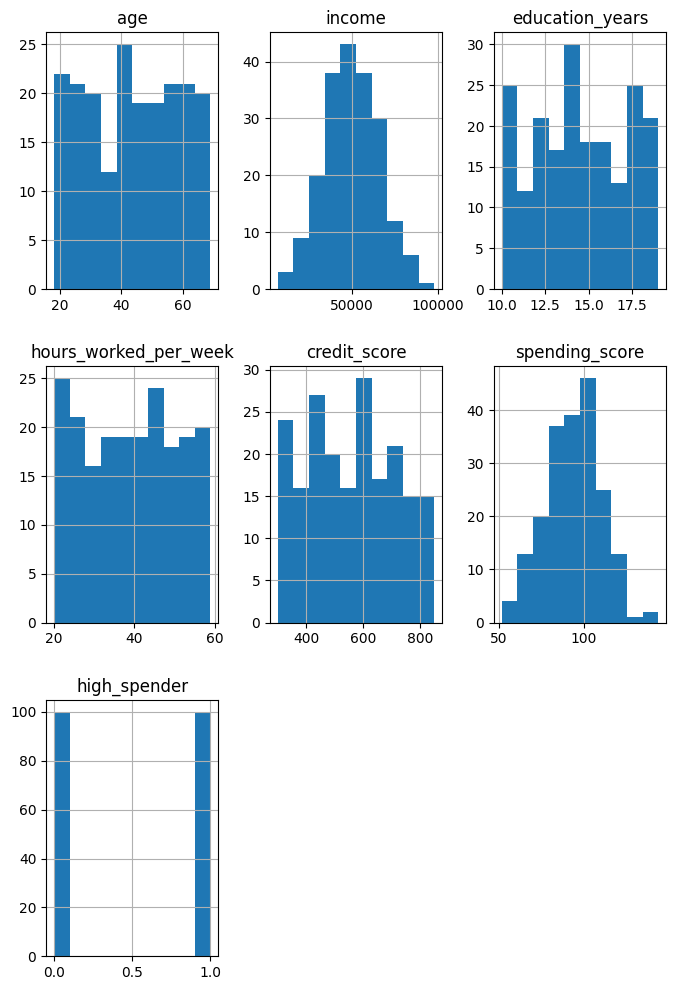

In [3]:
df.hist(figsize = (8,12))

In [4]:
df.columns.to_list()

['age',
 'income',
 'education_years',
 'hours_worked_per_week',
 'credit_score',
 'spending_score',
 'high_spender']

In [5]:
X = df[['age',
 'income',
 'education_years',
 'hours_worked_per_week',
 'credit_score',
 'spending_score']]

In [6]:
y = df['high_spender']

In [10]:
from sklearn.compose import make_column_selector as selector
num_selector = selector(dtype_include = np.number)
cat_selector = selector(dtype_include = ['category', 'bool', 'object'])
num_features = num_selector(X)
cat_features = cat_selector(X)

In [11]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

In [12]:
numerical_pipe = Pipeline(steps = [
    ('imputer', SimpleImputer(strategy  = "median")),
    ('scaler', StandardScaler())
])

In [13]:
categorical_pipe = Pipeline(steps = [
    ('imputer', SimpleImputer(strategy = 'most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown = 'ignore', sparse_output = False))
])

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter = 2000)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    X,y,
    test_size = 0.2,
    random_state = 99
)

In [17]:
preproc = ColumnTransformer(transformers = [
    ('num', numerical_pipe, num_features),
    ("cat", categorical_pipe, cat_features)
])

In [21]:
full_pipeline = Pipeline([
    ('preproc', preproc),
    ('model', model)
])

In [23]:
full_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preproc',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'income',
                                                   'education_years',
                                                   'hours_worked_per_week',
                                                   'credit_score',
                                                   'spending_score']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  [])])),
                ('model', LogisticRegression(max_iter=2000))])

In [24]:
y_pred = full_pipeline.predict(X_test)

In [25]:
y_pred[:20]

array([0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1])

In [26]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, classification_report

In [32]:
print("Baseline model Metrics")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("f1:", f1_score(y_test, y_pred))
print("\nClassification Report\n", classification_report(y_test, y_pred))

Baseline model Metrics
Accuracy: 0.975
Precision: 1.0
Recall: 0.9473684210526315
f1: 0.972972972972973

Classification Report
               precision    recall  f1-score   support

           0       0.95      1.00      0.98        21
           1       1.00      0.95      0.97        19

    accuracy                           0.97        40
   macro avg       0.98      0.97      0.97        40
weighted avg       0.98      0.97      0.97        40



In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

ridge_lr = LogisticRegression(
    penalty = 'l2',
    solver = 'lbfgs',
    max_iter = 2000
)

In [39]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
cv = StratifiedKFold(
    n_splits =5,
    shuffle = True,
    random_state = 99
)

In [34]:
param_grid = {'model__C': np.logspace (-3,3,9)}

In [42]:
scoring = {
    "accuracy":"accuracy",
    "precision":"precision",
    "f1":"f1"
}

In [43]:
ridge_pipe = Pipeline([
    ('preproc', preproc),
    ("model", ridge_lr)
])

In [44]:
grid = GridSearchCV(
    estimator = ridge_pipe,
    param_grid = param_grid,
    scoring = scoring,
    refit = 'f1',
    cv=cv,
    n_jobs = -1,
    return_train_score = False
)

In [45]:
grid.fit(X,y)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=99, shuffle=True),
             estimator=Pipeline(steps=[('preproc',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['age',
                                                                          'income',
                                                                          'education_years',
                                                                          'hours_worked_per_week',
                                                                          'credit_score',
                                                                          'spending_score']),
                                                                        ('cat',
                                                                         Pipeline(st...
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         [])])),
                                       ('model',
                                        LogisticRegression(max_iter=2000))]),
             n_jobs=-1,
             param_grid={'model__C': array([1.00000000e-03, 5.62341325e-03, 3.16227766e-02, 1.77827941e-01,
       1.00000000e+00, 5.62341325e+00, 3.16227766e+01, 1.77827941e+02,
       1.00000000e+03])},
             refit='f1',
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision'})

In [46]:
grid.best_params_

{'model__C': np.float64(31.622776601683793)}

In [48]:
best_C = grid.best_params_["model__C"]
best_i = grid.best_index_

In [54]:
cr = grid.cv_results_
mean_acc = cr['mean_test_accuracy'][best_i]
std_acc = cr['std_test_accuracy'][best_i]

mean_prec = cr['mean_test_precision'][best_i]
std_prec = cr['std_test_precision'][best_i]

mean_f1 = cr['mean_test_f1'][best_i]
std_f1 = cr['std_test_f1'][best_i]

In [57]:
print({
    "accuracy": (mean_acc, std_acc),
    "precision": (mean_prec, std_prec),
    'f1': (mean_f1, std_f1),
    "C": cr["param_model__C"][best_i]
})

{'accuracy': (np.float64(0.975), np.float64(0.022360679774997918)), 'precision': (np.float64(0.9804761904761905), np.float64(0.02392353654681997)), 'f1': (np.float64(0.9745956354300385), np.float64(0.022969799320394467)), 'C': np.float64(31.622776601683793)}


Lasso Regression

In [59]:
from sklearn.linear_model import LogisticRegression
lasso_lr = LogisticRegression(
    penalty = 'l1',
    solver = 'saga',
    max_iter = 2000
)

In [61]:
lasso_pipe = Pipeline([
    ('preproc', preproc),
    ('model', lasso_lr)
])

In [62]:
param_grid_lasso = {"model__C": np.logspace(-3,3,9)}

In [63]:
grid_lasso = GridSearchCV(
    estimator = lasso_pipe,
    param_grid = param_grid_lasso,
    scoring = scoring,
    refit = 'f1',
    cv=cv,
    n_jobs = -1,

)

In [64]:
grid_lasso.fit(X,y)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=99, shuffle=True),
             estimator=Pipeline(steps=[('preproc',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['age',
                                                                          'income',
                                                                          'education_years',
                                                                          'hours_worked_per_week',
                                                                          'credit_score',
                                                                          'spending_score']),
                                                                        ('cat',
                                                                         Pipeline(st...
                                                                                                        sparse_output=False))]),
                                                                         [])])),
                                       ('model',
                                        LogisticRegression(max_iter=2000,
                                                           penalty='l1',
                                                           solver='saga'))]),
             n_jobs=-1,
             param_grid={'model__C': array([1.00000000e-03, 5.62341325e-03, 3.16227766e-02, 1.77827941e-01,
       1.00000000e+00, 5.62341325e+00, 3.16227766e+01, 1.77827941e+02,
       1.00000000e+03])},
             refit='f1',
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision'})

In [65]:
grid_lasso.cv_results_

{'mean_fit_time': array([0.01392636, 0.01264291, 0.01466107, 0.01483488, 0.02483039,
        0.07785702, 0.13249497, 0.12586951, 0.12593794]),
 'std_fit_time': array([0.00127229, 0.00031722, 0.00258368, 0.00238463, 0.00444214,
        0.0048942 , 0.0133842 , 0.00275174, 0.00200021]),
 'mean_score_time': array([0.01816463, 0.01847415, 0.01686502, 0.01721735, 0.01940989,
        0.01672015, 0.01561956, 0.01669316, 0.01540217]),
 'std_score_time': array([0.00102798, 0.00217633, 0.00067771, 0.00117534, 0.00274543,
        0.00080937, 0.00072877, 0.00265804, 0.00182202]),
 'param_model__C': masked_array(data=[0.001, 0.005623413251903491, 0.03162277660168379,
                    0.1778279410038923, 1.0, 5.623413251903491,
                    31.622776601683793, 177.82794100389228, 1000.0],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value=1e+20),
 'params': [{'model__C': np.float64(0.001)},
  {'model__C': np.float64(0.0

In [66]:
grid_lasso.best_params_

{'model__C': np.float64(0.03162277660168379)}

In [68]:
best_C = grid_lasso.best_params_["model__C"]
best_i = grid_lasso.best_index_

In [69]:
cr = grid_lasso.cv_results_

In [76]:
mean_acc = cr["mean_test_accuracy"][best_i]
std_acc = cr["std_test_accuracy"][best_i]

mean_prec = cr['mean_test_precision'][best_i]
std_prec = cr["std_test_precision"][best_i]

mean_f1 = cr["mean_test_f1"][best_i]
std_f1 = cr["std_test_f1"][best_i]

In [77]:
print({
    "accuracy": (mean_acc, std_acc),
    "precision": (mean_prec, std_prec),
    "f1": (mean_f1, std_f1),
    "C": cr["param_model__C"][best_i]
})

{'accuracy': (np.float64(0.9949999999999999), np.float64(0.010000000000000009)), 'precision': (np.float64(0.9904761904761905), np.float64(0.019047619047619067)), 'f1': (np.float64(0.9951219512195122), np.float64(0.009756097560975618)), 'C': np.float64(0.03162277660168379)}


In [81]:
cv_df = pd.DataFrame(grid_lasso.cv_results_)
cv_df.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__C,params,split0_test_accuracy,split1_test_accuracy,split2_test_accuracy,split3_test_accuracy,...,std_test_precision,rank_test_precision,split0_test_f1,split1_test_f1,split2_test_f1,split3_test_f1,split4_test_f1,mean_test_f1,std_test_f1,rank_test_f1
0,0.013926,0.001272,0.018165,0.001028,0.001000,{'model__C': 0.001},0.5,0.500,0.500,0.500,...,0.200000,8,0.666667,0.666667,0.000000,0.666667,0.666667,0.533333,0.266667,8
1,0.012643,0.000317,0.018474,0.002176,0.005623,{'model__C': 0.005623413251903491},0.5,0.500,0.500,0.500,...,0.200000,9,0.000000,0.000000,0.666667,0.000000,0.000000,0.133333,0.266667,9
2,0.014661,0.002584,0.016865,0.000678,0.031623,{'model__C': 0.03162277660168379},1.0,0.975,1.000,1.000,...,0.019048,2,1.000000,0.975610,1.000000,1.000000,1.000000,0.995122,0.009756,1
3,0.014835,0.002385,0.017217,0.001175,0.177828,{'model__C': 0.1778279410038923},1.0,1.000,0.975,1.000,...,0.000000,1,1.000000,1.000000,0.974359,1.000000,1.000000,0.994872,0.010256,2
4,0.024830,0.004442,0.019410,0.002745,1.000000,{'model__C': 1.0},1.0,0.975,0.925,0.975,...,0.019048,2,1.000000,0.975610,0.918919,0.974359,1.000000,0.973778,0.029626,6
5,0.077857,0.004894,0.016720,0.000809,5.623413,{'model__C': 5.623413251903491},1.0,0.975,0.925,0.950,...,0.023924,7,1.000000,0.975610,0.918919,0.950000,1.000000,0.968906,0.031096,7
6,0.132495,0.013384,0.015620,0.000729,31.622777,{'model__C': 31.622776601683793},1.0,0.975,0.950,0.975,...,0.023328,4,1.000000,0.975610,0.947368,0.975610,1.000000,0.979718,0.019509,3
7,0.125870,0.002752,0.016693,0.002658,177.827941,{'model__C': 177.82794100389228},1.0,0.975,0.925,0.975,...,0.023328,4,1.000000,0.975610,0.918919,0.975610,1.000000,0.974028,0.029635,4
8,0.125938,0.002000,0.015402,0.001822,1000.000000,{'model__C': 1000.0},1.0,0.975,0.925,0.975,...,0.023328,4,1.000000,0.975610,0.918919,0.975610,1.000000,0.974028,0.029635,4
